In [ ]:
import os
# This script is intended to be run from the client node
# make sure this path points to the Symbi-OS repository on the client
ARTIFACTS_PATH='/home/sym/Symbi-OS/artifacts'
#NOTE!: Make sure the path for REDIS_BIN in artifacts/redis/run_redis_benchmarks.py line 34
#is correct for your setup, this should be the path to the redis artifact on your server
#for now it assumes a sym vm i.e. /home/sym/Symbi-OS...

#We assume the host already has the Symbi-OS repository cloned and built appropriately, mitigations 
# have run, and that the prep_envt.sh script is called in the server's .bashrc.
#NOTE!: Tools must be built with DEEP_SC_DEFINE="-DDEEP_SHORTCUT" to do deep shortcutting

#ip of the node to launch the server on
SERVER_IP='192.168.122.85'

#we use ssh to kick off servers, if user is different on server give the name here
UNAME='sym'

#how many times to run experiment
ITER=5

REQUESTS=1000000
PIPELINE=16
CLIENTS=100


normal_cmd=f'.{ARTIFACTS_PATH}/redis/run_redis_benchmarks.py -n normal -s {SERVER_IP} -u {UNAME} -i {ITER} \
-r {REQUESTS} -c {CLIENTS} -p {PIPELINE} --max_instances=1 -v -o'

deep_sc_cmd=f'.{ARTIFACTS_PATH}/redis/run_redis_benchmarks.py -n deep_sc -s {SERVER_IP} -u {UNAME} -i {ITER} \
-r {REQUESTS} -c {CLIENTS} -p {PIPELINE} --max_instances=1 -v -o -dsc'

os.system(normal_cmd)
os.system(deep_sc_cmd)


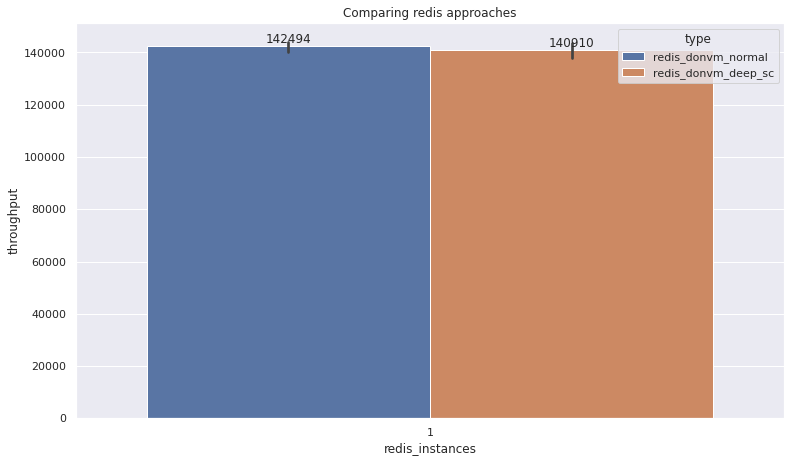

In [2]:
import pandas as pd
import seaborn as sb

sb.set_theme(style="darkgrid")
sb.color_palette("Set2")
sb.set(rc={'figure.figsize':(12.7, 7.27)})

def preprocess_data(data: pd.DataFrame):
    base_tp_val = 0
    for i in range(len(data['redis_instances'])):
        if i == 0:
            base_tp_val = float(data['throughput'][i])
        
        data['throughput'][i] /= base_tp_val

df = pd.read_csv("redis_vm_results.csv")
#preprocess_data(df)

g = sb.barplot(data=df, x='redis_instances', y='throughput', hue='type')
#g.set_xticks(range(len(df)))
#g.set_yticks(range(0, 16))
#g.set_yticks(range(0, 500000, 25000))
g.set(title='Comparing redis approaches')

for i in range(len(g.containers)):
    g.bar_label(g.containers[i])